In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("car_age_price.csv""")

In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [21]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


data.info()

# correlation 

In [25]:
corrmatrix=data.corr()

<AxesSubplot:>

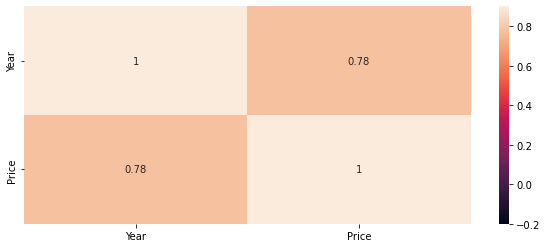

In [26]:
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9,annot=True)



In [27]:
y=data["Price"]
X=data.drop(["Price"],axis=1)

In [30]:
print(X)

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns]


# Linear Regression

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [63]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [64]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [65]:
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
print("mean squared error is:",mean_squared_error(y_test,predictions))

mean squared error is: 4326906256.829671


In [67]:
print("r sqaured value is:",r2_score(y_test,predictions))

r sqaured value is: 0.36759313425902185


# lasso regression

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [69]:
X_train.shape

(89, 1)

In [70]:
y_train.shape

(89,)

In [71]:
from sklearn.linear_model import Lasso


In [72]:
#train the model

In [73]:
lasso=Lasso(alpha=1.0)
lasso.fit(X_train,y_train)

Lasso()

In [76]:
y_pred1=lasso.predict(X_test)

In [77]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [78]:
y_pred1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [ ]:
#calculate mean squared error

In [79]:
mean_squared_error=np.mean((y_pred1-y_test)**2)
print('Mean squared error on test set',mean_squared_error)

Mean squared error on test set 4326859771.015669


In [ ]:
#calculated r sqaured error

In [85]:
r_squared_error=r2_score(y_test,y_pred1)
print('R sqaured error is:',r_squared_error)

R sqaured error is: 0.3675999284778446


In [86]:
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]=X_train.columns
lasso_coeff['Coefficient Estimate']=pd.Series(lasso.coef_)
print(lasso_coeff)

  Columns  Coefficient Estimate
0    Year            47608.1556


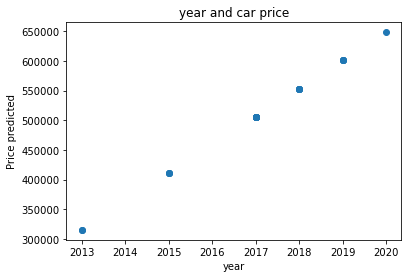

In [95]:
plt.scatter(X_test,y_pred1)
plt.title("year and car price")
plt.xlabel("year")
plt.ylabel("Price predicted")
plt.show()

In [ ]:
""" 
The Mean square value predicted from linear regression= 4326906256.829671,
the R square value predicted from linear regression=0.36759313425902185,
The Mean sqaure value predicted from Lasso regression=4326859771.015669,
the R sqaured value predicted from lasso regression=0.3675999284778446.

The mean squared and R sqaured values from both the regressions are almost the same.
"""